Midterm project: Employee Attrition Report

About Dataset: Predict attrition of your valuable employees. Uncover the factors that lead to employee attrition. This is a fictional data set created by IBM data scientists.

In [109]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

import matplotlib.pyplot as plt

from IPython.display import display

from tqdm.auto import tqdm

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb


In [110]:
df = pd.read_csv('HR Employee Attrition.csv')
df.columns = df.columns.str.lower()
df.head().T

,0,1,2,3,4
age,41,49,37,33,27
attrition,Yes,No,Yes,No,No
businesstravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
dailyrate,1102,279,1373,1392,591
department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
distancefromhome,1,8,2,3,2
education,2,1,2,4,1
educationfield,Life Sciences,Life Sciences,Other,Life Sciences,Medical
employeecount,1,1,1,1,1
employeenumber,1,2,4,5,7


EDA

In [111]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].dtype)
    print(df[col].nunique())
    print()

age
[41 49 37 33 27]
int64
43

attrition
['Yes' 'No']
object
2

businesstravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
object
3

dailyrate
[1102  279 1373 1392  591]
int64
886

department
['Sales' 'Research & Development' 'Human Resources']
object
3

distancefromhome
[ 1  8  2  3 24]
int64
29

education
[2 1 4 3 5]
int64
5

educationfield
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree']
object
6

employeecount
[1]
int64
1

employeenumber
[1 2 4 5 7]
int64
1470

environmentsatisfaction
[2 3 4 1]
int64
4

gender
['Female' 'Male']
object
2

hourlyrate
[94 61 92 56 40]
int64
71

jobinvolvement
[3 2 4 1]
int64
4

joblevel
[2 1 3 4 5]
int64
5

jobrole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative']
object
9

jobsatisfaction
[4 2 3 1]
int64
4

maritalstatus
['Single' 'Married' 'Divorced']
object
3

monthlyincome
[5993 5130 2090 2909 3468]
int64
1349

monthlyrate
[19479 24907  2396 23159 16632]


In [112]:
df.attrition.value_counts()

attrition
No     1233
Yes     237
Name: count, dtype: int64

In [113]:
education_values = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
df.education = df.education.map(education_values)

environment_values = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df.environmentsatisfaction = df.environmentsatisfaction.map(environment_values)

involvement_values = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df.jobinvolvement = df.jobinvolvement.map(involvement_values)

jobsatisfaction_values = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df.jobsatisfaction = df.jobsatisfaction.map(jobsatisfaction_values) 

performance_values = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}
df.performancerating = df.performancerating.map(performance_values)

relationshipSatisfaction_values = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df.relationshipsatisfaction = df.relationshipsatisfaction.map(relationshipSatisfaction_values)

WorkLifeBalance_values = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}
df.worklifebalance = df.worklifebalance.map(WorkLifeBalance_values)

In [114]:
attrition_values = {
    'Yes': 1,
    'No': 0
}
df.attrition = df.attrition.map(attrition_values)
df.head().T

,0,1,2,3,4
age,41,49,37,33,27
attrition,1,0,1,0,0
businesstravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
dailyrate,1102,279,1373,1392,591
department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
distancefromhome,1,8,2,3,2
education,College,Below College,College,Master,Below College
educationfield,Life Sciences,Life Sciences,Other,Life Sciences,Medical
employeecount,1,1,1,1,1
employeenumber,1,2,4,5,7


In [115]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
age,1470.0,37.0,9.0,18.0,30.0,36.0,43.0,60.0
attrition,1470.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
dailyrate,1470.0,802.0,404.0,102.0,465.0,802.0,1157.0,1499.0
distancefromhome,1470.0,9.0,8.0,1.0,2.0,7.0,14.0,29.0
employeecount,1470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
employeenumber,1470.0,1025.0,602.0,1.0,491.0,1020.0,1556.0,2068.0
hourlyrate,1470.0,66.0,20.0,30.0,48.0,66.0,84.0,100.0
joblevel,1470.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0
monthlyincome,1470.0,6503.0,4708.0,1009.0,2911.0,4919.0,8379.0,19999.0
monthlyrate,1470.0,14313.0,7118.0,2094.0,8047.0,14236.0,20462.0,26999.0


In [116]:
df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [117]:
df.attrition.value_counts(normalize=True)

attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

In [118]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=2)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.attrition.values
y_val = df_val.attrition.values
y_test = df_test.attrition.values

del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

In [119]:
global_attrition = df_full_train.attrition.mean()
global_attrition

0.1522108843537415

In [120]:
categorical = [i for i in df.columns if df[i].dtype == 'object']
categorical

['businesstravel',
 'department',
 'education',
 'educationfield',
 'environmentsatisfaction',
 'gender',
 'jobinvolvement',
 'jobrole',
 'jobsatisfaction',
 'maritalstatus',
 'over18',
 'overtime',
 'performancerating',
 'relationshipsatisfaction',
 'worklifebalance']

In [121]:
for f in categorical:
    print(f)
    df_group = df_full_train.groupby(f).attrition.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_attrition
    df_group['risk'] = df_group['mean'] / global_attrition
    display(df_group)
    print()
    print()

businesstravel


,mean,count,diff,risk
businesstravel,,,,
Non-Travel,0.057377,122,-0.094834,0.376958
Travel_Frequently,0.240909,220,0.088698,1.582732
Travel_Rarely,0.142686,834,-0.009525,0.937422




department


,mean,count,diff,risk
department,,,,
Human Resources,0.156863,51,0.004652,1.030562
Research & Development,0.125161,775,-0.027050,0.822289
Sales,0.211429,350,0.059218,1.389050




education


,mean,count,diff,risk
education,,,,
Bachelor,0.165591,465,0.013381,1.087908
Below College,0.165414,133,0.013203,1.086739
College,0.132420,219,-0.019791,0.869978
Doctor,0.108108,37,-0.044103,0.710252
Master,0.145963,322,-0.006248,0.958951




educationfield


,mean,count,diff,risk
educationfield,,,,
Human Resources,0.285714,21,0.133503,1.877095
Life Sciences,0.142268,485,-0.009943,0.934677
Marketing,0.234375,128,0.082164,1.539804
Medical,0.112637,364,-0.039574,0.740009
Other,0.142857,70,-0.009354,0.938547
Technical Degree,0.212963,108,0.060752,1.399131




environmentsatisfaction


,mean,count,diff,risk
environmentsatisfaction,,,,
High,0.118310,355,-0.033901,0.777276
Low,0.251121,223,0.098910,1.649823
Medium,0.134454,238,-0.017757,0.883339
Very High,0.136111,360,-0.016100,0.894227




gender


,mean,count,diff,risk
gender,,,,
Female,0.136082,485,-0.016128,0.894039
Male,0.163531,691,0.011320,1.074372




jobinvolvement


,mean,count,diff,risk
jobinvolvement,,,,
High,0.137628,683,-0.014583,0.904194
Low,0.347222,72,0.195011,2.281192
Medium,0.160000,300,0.007789,1.051173
Very High,0.099174,121,-0.053037,0.651554




jobrole


,mean,count,diff,risk
jobrole,,,,
Healthcare Representative,0.066038,106,-0.086173,0.433857
Human Resources,0.195122,41,0.042911,1.281919
Laboratory Technician,0.228571,210,0.076361,1.501676
Manager,0.055556,72,-0.096655,0.364991
Manufacturing Director,0.051282,117,-0.100929,0.336914
Research Director,0.027027,74,-0.125184,0.177563
Research Scientist,0.137339,233,-0.014872,0.902295
Sales Executive,0.174419,258,0.022208,1.145901
Sales Representative,0.415385,65,0.263174,2.729007




jobsatisfaction


,mean,count,diff,risk
jobsatisfaction,,,,
High,0.161473,353,0.009262,1.060851
Low,0.213333,225,0.061122,1.401564
Medium,0.130802,237,-0.021409,0.859345
Very High,0.119114,361,-0.033097,0.782556



maritalstatus


,mean,count,diff,risk
maritalstatus,,,,
Divorced,0.100775,258,-0.051436,0.662076
Married,0.115888,535,-0.036323,0.761364
Single,0.237598,383,0.085387,1.560978




over18


,mean,count,diff,risk
over18,,,,
Y,0.152211,1176,0.0,1.0




overtime


,mean,count,diff,risk
overtime,,,,
No,0.098246,855,-0.053965,0.645457
Yes,0.295950,321,0.143739,1.944343




performancerating


,mean,count,diff,risk
performancerating,,,,
Excellent,0.155466,997,0.003256,1.021388
Outstanding,0.134078,179,-0.018133,0.880871




relationshipsatisfaction


,mean,count,diff,risk
relationshipsatisfaction,,,,
High,0.146907,388,-0.005304,0.965156
Low,0.177885,208,0.025674,1.168672
Medium,0.142857,231,-0.009354,0.938547
Very High,0.148997,349,-0.003214,0.978886




worklifebalance


,mean,count,diff,risk
worklifebalance,,,,
Bad,0.307692,65,0.155481,2.021487
Best,0.113043,115,-0.039167,0.742677
Better,0.134266,715,-0.017945,0.882103
Good,0.177936,281,0.025725,1.169009


The analysis of categorical feature correlation with the target variable 'attrition' reveals that features 'educationfield', 'environmentsatisfaction', 'worklifebalance', 'jobinvolvement', 'overtime', 'jobrole', 'businesstravel', and 'maritalstatus' have pronounced more effects on attrition then other. Let's use only these features

In [122]:
numerical = [i for i in df.columns if df[i].dtype != 'object']
numerical.remove('attrition')
numerical

['age',
 'dailyrate',
 'distancefromhome',
 'employeecount',
 'employeenumber',
 'hourlyrate',
 'joblevel',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'standardhours',
 'stockoptionlevel',
 'totalworkingyears',
 'trainingtimeslastyear',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
 'yearswithcurrmanager']

In [123]:
df_full_train[numerical].corrwith(df_full_train.attrition).abs()

c:\Users\Maria\Documents\ML\Employee-Attrition-Service\.venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Maria\Documents\ML\Employee-Attrition-Service\.venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


age                        0.144193
dailyrate                  0.058076
distancefromhome           0.094074
employeecount                   NaN
employeenumber             0.014095
hourlyrate                 0.011728
joblevel                   0.150653
monthlyincome              0.142724
monthlyrate                0.001977
numcompaniesworked         0.024373
percentsalaryhike          0.029314
standardhours                   NaN
stockoptionlevel           0.136390
totalworkingyears          0.149871
trainingtimeslastyear      0.047373
yearsatcompany             0.112577
yearsincurrentrole         0.151926
yearssincelastpromotion    0.000036
yearswithcurrmanager       0.142484
dtype: float64

The analysis of numerical feature correlation with the target variable 'attrition' reveals that features 'age', 'joblevel', 'monthlyincome', 'stockoptionlevel', 'totalworkingyears','yearsatcompany', 'yearsincurrentrole', 'yearswithcurrmanager'  have pronounced more effects on attrition then other. 

In [124]:
df = pd.read_csv('HR Employee Attrition.csv')
df.columns = df.columns.str.lower()

attrition_values = {
    'Yes': 1,
    'No': 0
}
df.attrition = df.attrition.map(attrition_values)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=2)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.attrition.values
y_val = df_val.attrition.values
y_test = df_test.attrition.values

del df_train['attrition']
del df_val['attrition']
del df_test['attrition']


Logistic Regression

In [125]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(val_dict)

In [126]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [127]:
y_pred = model.predict_proba(X_val)[:,1]
(y_val == (y_pred >= 0.5)).mean()

0.8741496598639455

Let's choose a threshold

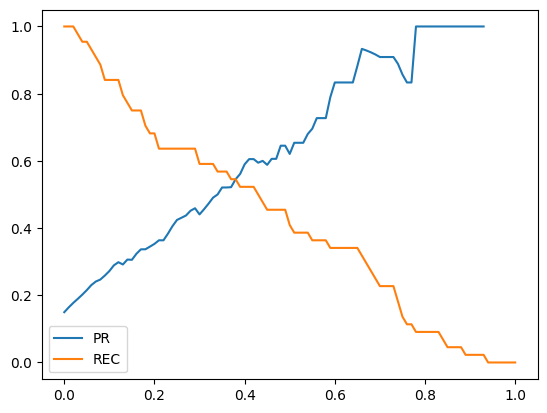

In [128]:
thresholds = np.linspace(0, 1, 101)
scores = []

for t in thresholds:
  tn = ((y_val == 0) & (y_pred < t)).sum()
  fn = ((y_val == 1) & (y_pred < t)).sum()
  fp = ((y_val == 0) & (y_pred >= t)).sum()
  tp = ((y_val == 1) & (y_pred >= t)).sum()

  scores.append((t, tp, fp, fn, tn))


columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

plt.plot(df_scores.threshold, df_scores['precision'], label='PR')
plt.plot(df_scores.threshold, df_scores['recall'], label='REC')
plt.legend()

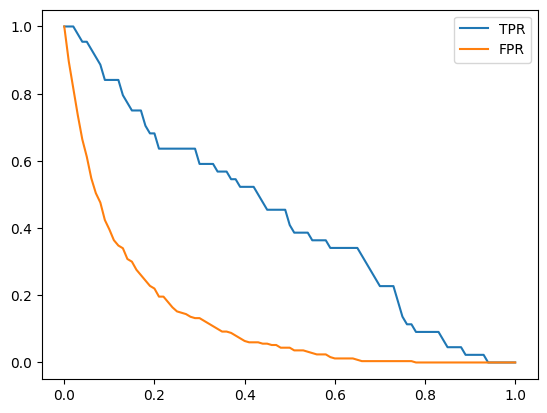

In [129]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

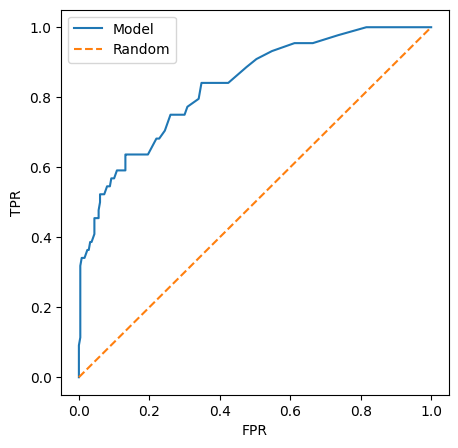

In [130]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [131]:
auc_val = auc(df_scores.fpr, df_scores.tpr)
auc_val

0.8324090909090909

In [132]:
df_scores[(df_scores.threshold >= 0.3) & (df_scores.threshold <= 0.45)]

,threshold,tp,fp,fn,tn,precision,recall,tpr,fpr
30,0.30,26,33,18,217,0.440678,0.590909,0.590909,0.132
31,0.31,26,31,18,219,0.456140,0.590909,0.590909,0.124
32,0.32,26,29,18,221,0.472727,0.590909,0.590909,0.116
33,0.33,26,27,18,223,0.490566,0.590909,0.590909,0.108
34,0.34,25,25,19,225,0.500000,0.568182,0.568182,0.100
35,0.35,25,23,19,227,0.520833,0.568182,0.568182,0.092
36,0.36,25,23,19,227,0.520833,0.568182,0.568182,0.092
37,0.37,24,22,20,228,0.521739,0.545455,0.545455,0.088
38,0.38,24,20,20,230,0.545455,0.545455,0.545455,0.080
39,0.39,23,18,21,232,0.560976,0.522727,0.522727,0.072


0.38 seems the best threshold.
Now let's try different C for model.

In [133]:
def train(df_train, C):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    y_train = df_train.attrition.values

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    return dv, model

def predict(model, X_val):
    y_pred = model.predict_proba(X_val)[:,1]
    return y_pred

In [134]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.attrition.values
        y_val = df_val.attrition.values

        dv, model = train(df_train, C)
        val_dict = df_val[categorical + numerical].to_dict(orient='records')
        X_val = dv.transform(val_dict) 
        y_val = df_val.attrition.values
        y_pred  = predict(model, X_val)

        auc_val = roc_auc_score(y_val, y_pred)
        scores.append(auc_val)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.711 +- 0.044
C=0.01 0.802 +- 0.042
C=0.1 0.824 +- 0.030
C=0.5 0.835 +- 0.032
C=1 0.832 +- 0.029
C=5 0.832 +- 0.028
C=10 0.827 +- 0.032


In [135]:
n_splits = 5

for C in tqdm([0.5, 10, 15, 30]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.attrition.values
        y_val = df_val.attrition.values

        dv, model = train(df_train, C)
        val_dict = df_val[categorical + numerical].to_dict(orient='records')
        X_val = dv.transform(val_dict) 
        y_val = df_val.attrition.values
        y_pred  = predict(model, X_val)

        auc_val = roc_auc_score(y_val, y_pred)
        scores.append(auc_val)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.5 0.835 +- 0.032
C=10 0.827 +- 0.032
C=15 0.833 +- 0.030
C=30 0.830 +- 0.032


It looks like the best C is 0.5. So the final model for Logistic regression is:

In [136]:
dv = DictVectorizer(sparse=False)

full_train_dict = df_full_train[categorical + numerical].to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)
y_full_train = df_full_train.attrition.values


In [137]:
test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [138]:

model = LogisticRegression(solver='liblinear', C=0.5, max_iter=1000)
model.fit(X_full_train, y_full_train)


LogisticRegression(C=0.5, max_iter=1000, solver='liblinear')

In [139]:
y_pred = model.predict_proba(X_test)[:,1]
(y_test == (y_pred >= 0.38)).mean()

0.8707482993197279

In [140]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8345265926358856

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       236
           1       0.71      0.59      0.64        58

    accuracy                           0.87       294
   macro avg       0.81      0.76      0.78       294
weighted avg       0.86      0.87      0.87       294



<Axes: >

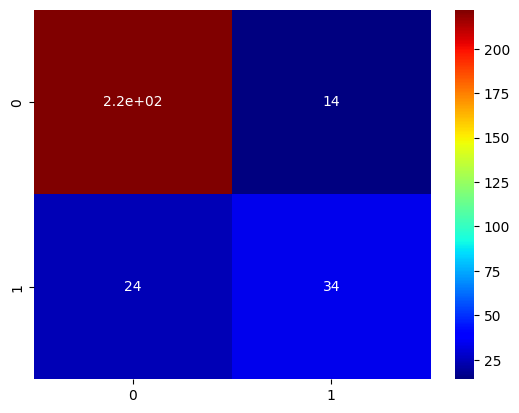

In [141]:
y_bin = (y_pred >= 0.38)

print(classification_report(y_test,y_bin))
cn=confusion_matrix(y_test,y_bin)
sns.heatmap(cn,annot=True,cmap='jet')

Decision Tree

In [142]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=2)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.attrition.values
y_val = df_val.attrition.values
y_test = df_test.attrition.values

del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

In [143]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

depths = [1, 2, 3, 4, 5, 6, 7,8,9, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.663
   2 -> 0.670
   3 -> 0.697
   4 -> 0.719
   5 -> 0.751
   6 -> 0.689
   7 -> 0.636
   8 -> 0.631
   9 -> 0.637
  10 -> 0.649
  15 -> 0.676
  20 -> 0.635
None -> 0.669


In [144]:
scores = []

for depth in [4, 5, 6, 7]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [145]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                     
max_depth             4      5      6      7
min_samples_leaf                            
1                 0.709  0.741  0.672  0.667
5                 0.717  0.726  0.701  0.700
10                0.707  0.737  0.721  0.713
15                0.745  0.728  0.709  0.740
20                0.728  0.713  0.685  0.718
100               0.711  0.711  0.711  0.711
200               0.709  0.709  0.709  0.709
500               0.500  0.500  0.500  0.500

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

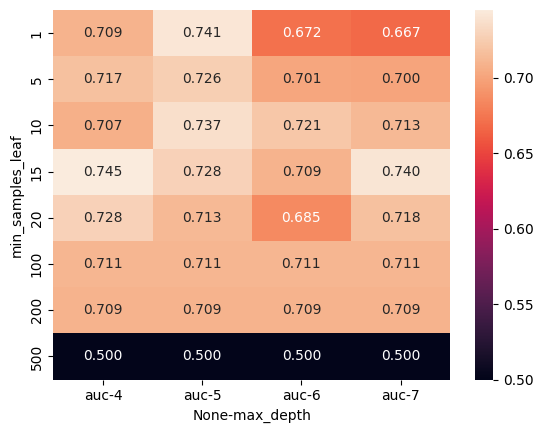

In [ ]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [173]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=14)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=14)

In [174]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- overtime=No <= 0.50
|   |--- totalworkingyears <= 8.50
|   |   |--- distancefromhome <= 12.50
|   |   |   |--- yearsatcompany <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- yearsatcompany >  3.50
|   |   |   |   |--- class: 0
|   |   |--- distancefromhome >  12.50
|   |   |   |--- class: 1
|   |--- totalworkingyears >  8.50
|   |   |--- jobrole=Sales Executive <= 0.50
|   |   |   |--- joblevel <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- joblevel >  1.50
|   |   |   |   |--- class: 0
|   |   |--- jobrole=Sales Executive >  0.50
|   |   |   |--- stockoptionlevel <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- stockoptionlevel >  0.50
|   |   |   |   |--- class: 0
|--- overtime=No >  0.50
|   |--- jobrole=Sales Representative <= 0.50
|   |   |--- environmentsatisfaction <= 1.50
|   |   |   |--- yearsincurrentrole <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- yearsincurrentrole >  1.50
|   |   |   |   |--- class: 0
|   |   |--- environmentsatisfactio

Random Forest

In [176]:
scores = []

for d in [5, 10, 15,20]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

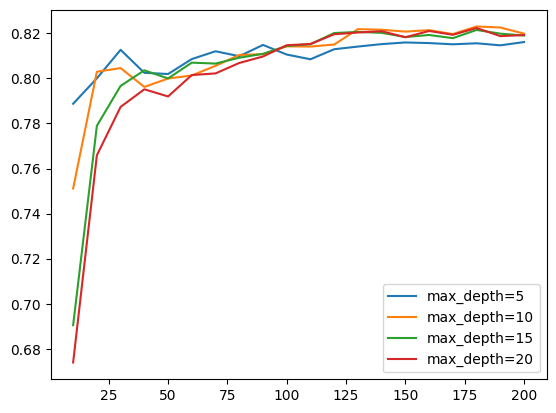

In [177]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [178]:
max_depth = 10
df_scores[df_scores.max_depth == 10]

,max_depth,n_estimators,auc
20,10,10,0.751136
21,10,20,0.802909
22,10,30,0.804545
23,10,40,0.796182
24,10,50,0.799909
25,10,60,0.801273
26,10,70,0.805545
27,10,80,0.810364
28,10,90,0.810727
29,10,100,0.814182


In [179]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

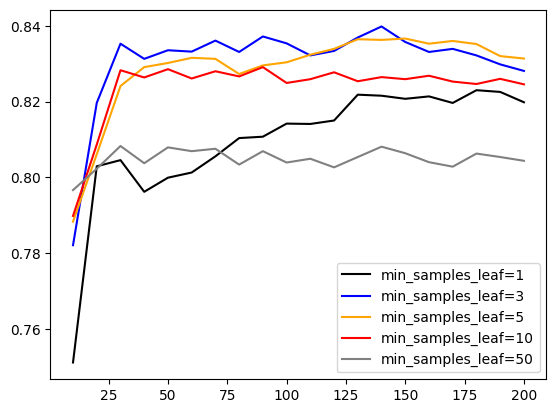

In [180]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [181]:
df_scores[df_scores.min_samples_leaf == 3]

,min_samples_leaf,n_estimators,auc
20,3,10,0.782091
21,3,20,0.819636
22,3,30,0.835273
23,3,40,0.831273
24,3,50,0.833545
25,3,60,0.833182
26,3,70,0.836091
27,3,80,0.833091
28,3,90,0.837182
29,3,100,0.835364


In [182]:
min_samples_leaf = 3
n_estimators = 140

In [183]:
rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=140,
                       random_state=1)

In [184]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.8398181818181817

XGBoost

In [247]:
features = dv.get_feature_names_out()
features = [f.replace('=', '_') for f in features]

In [248]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [249]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [250]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [191]:

s = output.stdout

In [164]:
print(s)

[0]	train-auc:0.90719	val-auc:0.70536
[5]	train-auc:0.99309	val-auc:0.77709
[10]	train-auc:0.99978	val-auc:0.80709
[15]	train-auc:0.99999	val-auc:0.79964
[20]	train-auc:1.00000	val-auc:0.80473
[25]	train-auc:1.00000	val-auc:0.79982
[30]	train-auc:1.00000	val-auc:0.80109
[35]	train-auc:1.00000	val-auc:0.79755
[40]	train-auc:1.00000	val-auc:0.79664
[45]	train-auc:1.00000	val-auc:0.79664
[50]	train-auc:1.00000	val-auc:0.79355
[55]	train-auc:1.00000	val-auc:0.79273
[60]	train-auc:1.00000	val-auc:0.79091
[65]	train-auc:1.00000	val-auc:0.79218
[70]	train-auc:1.00000	val-auc:0.79036
[75]	train-auc:1.00000	val-auc:0.79109
[80]	train-auc:1.00000	val-auc:0.79164
[85]	train-auc:1.00000	val-auc:0.79182
[90]	train-auc:1.00000	val-auc:0.79418
[95]	train-auc:1.00000	val-auc:0.79718
[100]	train-auc:1.00000	val-auc:0.79536
[105]	train-auc:1.00000	val-auc:0.79282
[110]	train-auc:1.00000	val-auc:0.79218
[115]	train-auc:1.00000	val-auc:0.79455
[120]	train-auc:1.00000	val-auc:0.79391
[125]	train-auc:1.0000

In [165]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [166]:
df_score = parse_xgb_output(output)

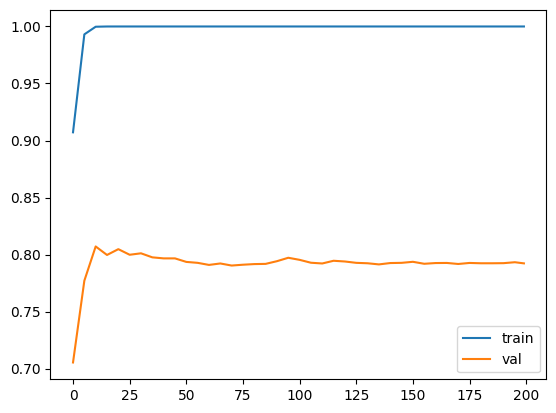

In [167]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [241]:
scores = {}

In [295]:
%%capture output

xgb_params = {
    'eta': 30, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [296]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'min_child=30'

In [258]:
scores.keys()

dict_keys(['eta=1'])

In [172]:
df_score = scores['eta=0.01']
df_score.train_auc


KeyboardInterrupt



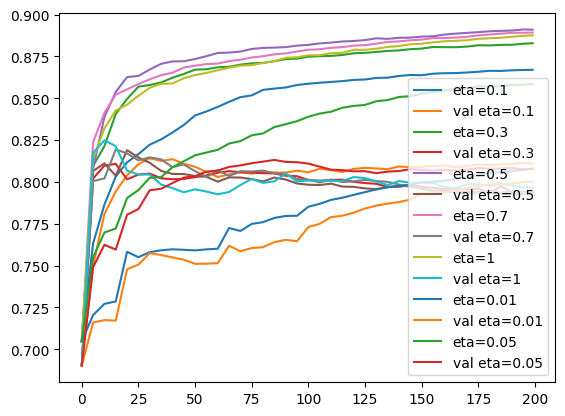

In [211]:
for k in ['eta=0.1', 'eta=0.3', 'eta=0.5', 'eta=0.7', 'eta=1', 'eta=0.01', 'eta=0.05']: #'eta=0.05', , 'eta=0.5', 'eta=1', 'eta=0.2', 'eta=0.3'
    df_scores = scores[k]
    plt.plot(df_scores.num_iter, df_scores.train_auc, label=k)
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=('val '+k))
plt.legend()


In [ ]:
eta = 1

In [278]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=15'

In [279]:
scores.keys()

dict_keys(['eta=1', 'max_depth=0', 'max_depth=2', 'max_depth=3', 'max_depth=4', 'max_depth=5', 'max_depth=7', 'max_depth=10', 'max_depth=15'])

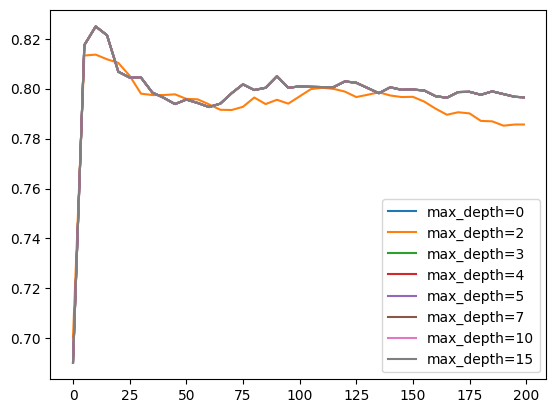

In [280]:
for d in [ 'max_depth=0', 'max_depth=2', 'max_depth=3', 'max_depth=4', 'max_depth=5', 'max_depth=7', 'max_depth=10', 'max_depth=15']:
    df_scores = scores[d]
    #plt.plot(df_scores.num_iter, df_scores.train_auc, label=k)
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=d)
plt.legend()

In [281]:
max_depth = 3

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [297]:
scores.keys()

dict_keys(['eta=1', 'max_depth=0', 'max_depth=2', 'max_depth=3', 'max_depth=4', 'max_depth=5', 'max_depth=7', 'max_depth=10', 'max_depth=15', 'min_child=1', 'min_child=2', 'min_child=3', 'min_child=5', 'min_child=10', 'min_child=15', 'min_child=30'])

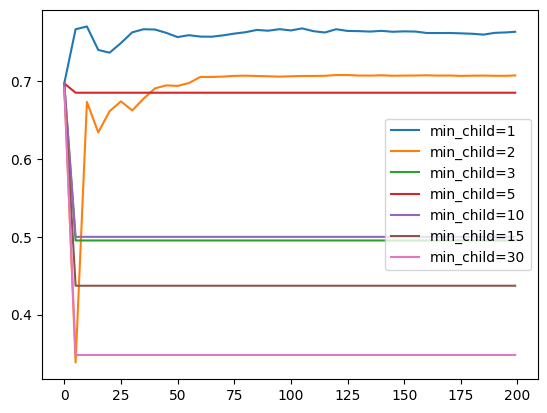

In [298]:
for ch in ['min_child=1', 'min_child=2', 'min_child=3', 'min_child=5', 'min_child=10', 'min_child=15', 'min_child=30']:
    df_scores = scores[ch]
    #plt.plot(df_scores.num_iter, df_scores.train_auc, label=k)
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=ch)
plt.legend()

In [299]:
min_child_weight=1
xgb_params = {
    'eta': 1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=70)

Let's choose the best model

In [300]:
df = pd.read_csv('HR Employee Attrition.csv')
df.columns = df.columns.str.lower()

attrition_values = {
    'Yes': 1,
    'No': 0
}
df.attrition = df.attrition.map(attrition_values)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=2)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.attrition.values
y_val = df_val.attrition.values
y_test = df_test.attrition.values
y_full_train = df_full_train.attrition.values

del df_train['attrition']
del df_full_train['attrition']
del df_val['attrition']
del df_test['attrition']

Lineal regression

In [301]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

model_regression = LogisticRegression(solver='liblinear', C=10, max_iter=1000)
model_regression.fit(X_train, y_train)

y_pred = model_regression.predict_proba(X_val)[:,1]

auc = roc_auc_score(y_val, y_pred)
auc

0.8352727272727273

Decision Tree

In [302]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.7342272727272727

Random Forest

In [303]:
rf = RandomForestClassifier(n_estimators=50,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.7999545454545455

In [311]:
features = dv.get_feature_names_out()
features = [f.replace('=', '_') for f in features]


XGBoost

In [305]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=70)

y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.838

The Logistic Regression and XGBoost have pretty similar scores, let's test both of them

In [306]:
ftrain_dicts = df_full_train.to_dict(orient='records')
X_full_train = dv.transform(ftrain_dicts)
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

model = xgb.train(xgb_params, dfulltrain, num_boost_round=70)

y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8167738164815898

In [307]:
dv = DictVectorizer(sparse=False)

ftrain_dict = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(ftrain_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

model_regression = LogisticRegression(solver='liblinear', C=10, max_iter=1000)
model_regression.fit(X_full_train, y_full_train)

y_pred = model_regression.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_pred)
auc

0.8302893045002921

Logistic regression is better on test data

In [308]:
import pickle

with open('model.bin', 'wb') as f_out: # 'wb' means write-binary
    pickle.dump((dv, model_regression), f_out)

In [309]:
import json

In [310]:
test_employee = df.iloc[40] 
test_employee_json = test_employee.to_json()
test_employee_json

'{"age":35,"attrition":0,"businesstravel":"Travel_Rarely","dailyrate":464,"department":"Research & Development","distancefromhome":4,"education":2,"educationfield":"Other","employeecount":1,"employeenumber":53,"environmentsatisfaction":3,"gender":"Male","hourlyrate":75,"jobinvolvement":3,"joblevel":1,"jobrole":"Laboratory Technician","jobsatisfaction":4,"maritalstatus":"Divorced","monthlyincome":1951,"monthlyrate":10910,"numcompaniesworked":1,"over18":"Y","overtime":"No","percentsalaryhike":12,"performancerating":3,"relationshipsatisfaction":3,"standardhours":80,"stockoptionlevel":1,"totalworkingyears":1,"trainingtimeslastyear":3,"worklifebalance":3,"yearsatcompany":1,"yearsincurrentrole":0,"yearssincelastpromotion":0,"yearswithcurrmanager":0}'